<a href="https://colab.research.google.com/github/kamarshahein/Epsilon/blob/main/DG%20time%20series.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [62]:
# Import the ARMA module from statsmodels
from statsmodels.tsa.arima_model import ARMA
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import seaborn as sns
from sklearn.metrics import mean_squared_error
%matplotlib inline


In [63]:
DG1 = pd.read_csv('/content/DGS10 v1.csv' )
DG1.head(50)

,DATE,DGS10
0,2017-02-10,2.41
1,2017-02-13,2.43
2,2017-02-14,2.47
3,2017-02-15,2.51
4,2017-02-16,2.45
5,2017-02-17,2.42
6,2017-02-20,.
7,2017-02-21,2.43
8,2017-02-22,2.42
9,2017-02-23,2.38


In [64]:
DG1 = DG1.replace(['.'],'0')


In [65]:
DG1.head(20)

,DATE,DGS10
0,2017-02-10,2.41
1,2017-02-13,2.43
2,2017-02-14,2.47
3,2017-02-15,2.51
4,2017-02-16,2.45
5,2017-02-17,2.42
6,2017-02-20,0
7,2017-02-21,2.43
8,2017-02-22,2.42
9,2017-02-23,2.38


In [66]:
DG1.describe()

,DATE,DGS10
count,1305,1305
unique,1305,252
top,2017-02-10,0
freq,1,53


In [67]:
#DG1=DG1.loc[(DG1!=0).any(axis=1)]

In [68]:

#DG1.head(40)

In [69]:
DG1.isnull().sum()

DATE     0
DGS10    0
dtype: int64

In [70]:
DG1.columns = ['Date', 'DG']

In [71]:
DG1.head(50)

,Date,DG
0,2017-02-10,2.41
1,2017-02-13,2.43
2,2017-02-14,2.47
3,2017-02-15,2.51
4,2017-02-16,2.45
5,2017-02-17,2.42
6,2017-02-20,0
7,2017-02-21,2.43
8,2017-02-22,2.42
9,2017-02-23,2.38


In [72]:

DG1['Date'] = pd.to_datetime(DG1['Date'])

In [73]:

DG1

,Date,DG
0,2017-02-10,2.41
1,2017-02-13,2.43
2,2017-02-14,2.47
3,2017-02-15,2.51
4,2017-02-16,2.45
...,...,...
1300,2022-02-04,1.93
1301,2022-02-07,1.92
1302,2022-02-08,1.96
1303,2022-02-09,1.94


In [74]:
DG1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1305 entries, 0 to 1304
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    1305 non-null   datetime64[ns]
 1   DG      1305 non-null   object        
dtypes: datetime64[ns](1), object(1)
memory usage: 20.5+ KB


In [75]:
DG1['DG'] = DG1['DG'].astype(float) 

In [76]:
DG1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1305 entries, 0 to 1304
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    1305 non-null   datetime64[ns]
 1   DG      1305 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 20.5 KB


In [77]:
DG1.set_index('Date', inplace=True)

In [78]:
DG1

,DG
Date,
2017-02-10,2.41
2017-02-13,2.43
2017-02-14,2.47
2017-02-15,2.51
2017-02-16,2.45
...,...
2022-02-04,1.93
2022-02-07,1.92
2022-02-08,1.96


In [79]:
DG1.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1305 entries, 2017-02-10 to 2022-02-10
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   DG      1305 non-null   float64
dtypes: float64(1)
memory usage: 20.4 KB


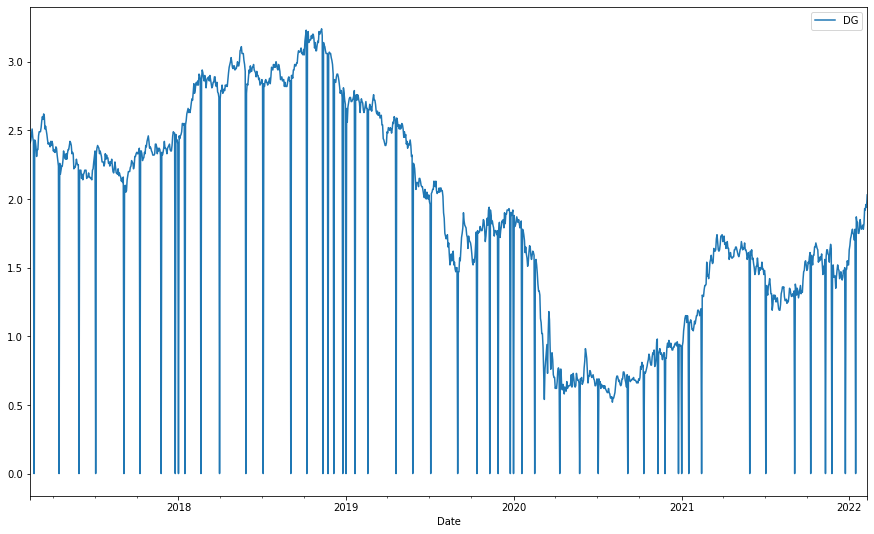

In [80]:
DG1[['DG']].plot(figsize=(15,9))

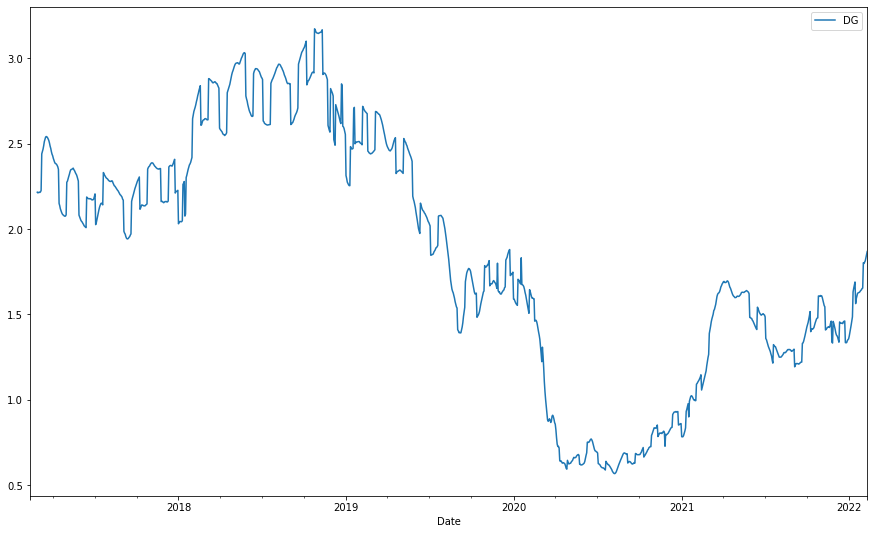

In [81]:
DG1[['DG']].rolling(12).mean().plot(figsize=(15,9))

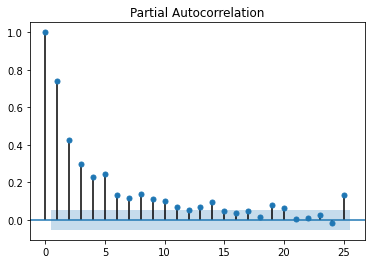

In [82]:
#to determine p
plot_pacf(DG1["DG"],lags=25)
plt.show()

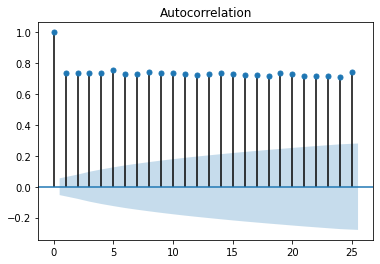

In [83]:
#to determine q
plot_acf(DG1["DG"],lags=25)
plt.show()

In [84]:
import matplotlib.pyplot as plt
import string

#Plots
import matplotlib.pyplot as plt
import seaborn as sns

In [85]:
DG2=pd.concat([DG1,DG1.shift(1)],axis=1)

In [86]:
DG2

,DG,DG
Date,,
2017-02-10,2.41,NaN
2017-02-13,2.43,2.41
2017-02-14,2.47,2.43
2017-02-15,2.51,2.47
2017-02-16,2.45,2.51
...,...,...
2022-02-04,1.93,1.82
2022-02-07,1.92,1.93
2022-02-08,1.96,1.92


In [87]:
DG2.columns=['t','t+1']

In [88]:
DG2

,t,t+1
Date,,
2017-02-10,2.41,NaN
2017-02-13,2.43,2.41
2017-02-14,2.47,2.43
2017-02-15,2.51,2.47
2017-02-16,2.45,2.51
...,...,...
2022-02-04,1.93,1.82
2022-02-07,1.92,1.93
2022-02-08,1.96,1.92


In [89]:
DG3=DG2[1:]


In [90]:
DG3.head()

,t,t+1
Date,,
2017-02-13,2.43,2.41
2017-02-14,2.47,2.43
2017-02-15,2.51,2.47
2017-02-16,2.45,2.51
2017-02-17,2.42,2.45


In [91]:
DG3_error=mean_squared_error(DG3.t,DG3.t+1)

In [92]:
DG3_error

1.0

In [93]:
np.sqrt(DG3_error)

1.0

In [95]:
#stationary test 
from statsmodels.tsa.stattools import adfuller
test_result=adfuller(DG1['DG'])

In [96]:
#Ho: It is non stationary
#H1: It is stationary

def adfuller_test(DG):
    result=adfuller(DG)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")

In [97]:
adfuller_test(DG1['DG'])

ADF Test Statistic : -1.3109421715265537
p-value : 0.6241515071365235
#Lags Used : 19
Number of Observations Used : 1285
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


In [98]:
DG1['DG First Difference'] = DG1['DG'] - DG1['DG'].shift(1)

In [99]:
DG1['DG'].shift(1)

Date
2017-02-10     NaN
2017-02-13    2.41
2017-02-14    2.43
2017-02-15    2.47
2017-02-16    2.51
              ... 
2022-02-04    1.82
2022-02-07    1.93
2022-02-08    1.92
2022-02-09    1.96
2022-02-10    1.94
Name: DG, Length: 1305, dtype: float64

In [100]:
DG1['Seasonal First Difference']=DG1['DG']-DG1['DG'].shift(12)


In [101]:
DG1.head(14)


,DG,DG First Difference,Seasonal First Difference
Date,,,
2017-02-10,2.41,NaN,NaN
2017-02-13,2.43,0.02,NaN
2017-02-14,2.47,0.04,NaN
2017-02-15,2.51,0.04,NaN
2017-02-16,2.45,-0.06,NaN
2017-02-17,2.42,-0.03,NaN
2017-02-20,0.00,-2.42,NaN
2017-02-21,2.43,2.43,NaN
2017-02-22,2.42,-0.01,NaN


In [102]:
## Again test dickey fuller test
adfuller_test(DG1['Seasonal First Difference'].dropna())

ADF Test Statistic : -10.234351179575581
p-value : 4.933828750003312e-18
#Lags Used : 23
Number of Observations Used : 1269
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary


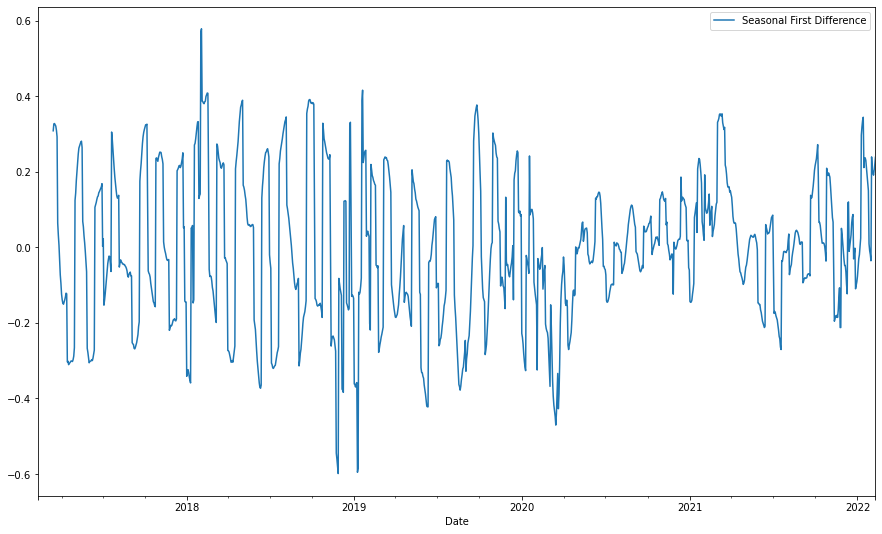

In [107]:
DG1[['Seasonal First Difference']].rolling(12).mean().plot(figsize=(15,9))


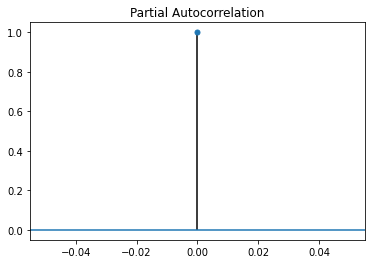

In [119]:
#to determine p
plot_pacf(DG1["Seasonal First Difference"],lags=100)
plt.show()

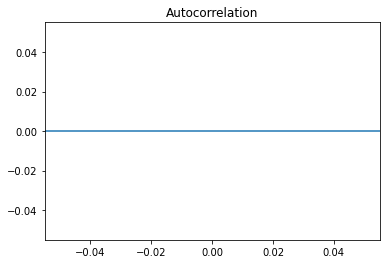

In [120]:
#to determine q
plot_acf(DG1["Seasonal First Difference"],lags=100)
plt.show()

In [121]:
DG3 = pd.DataFrame(index=dti,
    data=np.random.normal(size=periods) * vol *
        np.logspace(1,5,num=periods, dtype=int))
make_plot(DG3, "Volatility Increasing Time Series").show()

NameError: ignored

In [128]:
DG1['Score_Squareroot']=DG1['DG']**(1/2)


In [129]:
DG1

,DG,DG First Difference,Seasonal First Difference,Score_Squareroot
Date,,,,
2017-02-10,2.41,NaN,NaN,1.552417
2017-02-13,2.43,0.02,NaN,1.558846
2017-02-14,2.47,0.04,NaN,1.571623
2017-02-15,2.51,0.04,NaN,1.584298
2017-02-16,2.45,-0.06,NaN,1.565248
...,...,...,...,...
2022-02-04,1.93,0.11,0.10,1.389244
2022-02-07,1.92,-0.01,0.09,1.385641
2022-02-08,1.96,0.04,0.21,1.400000


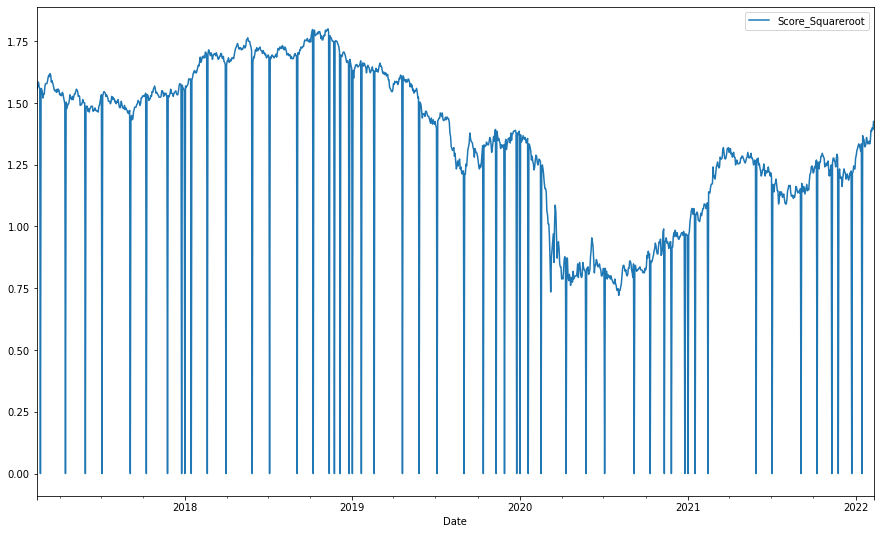

In [130]:
DG1[['Score_Squareroot']].plot(figsize=(15,9))

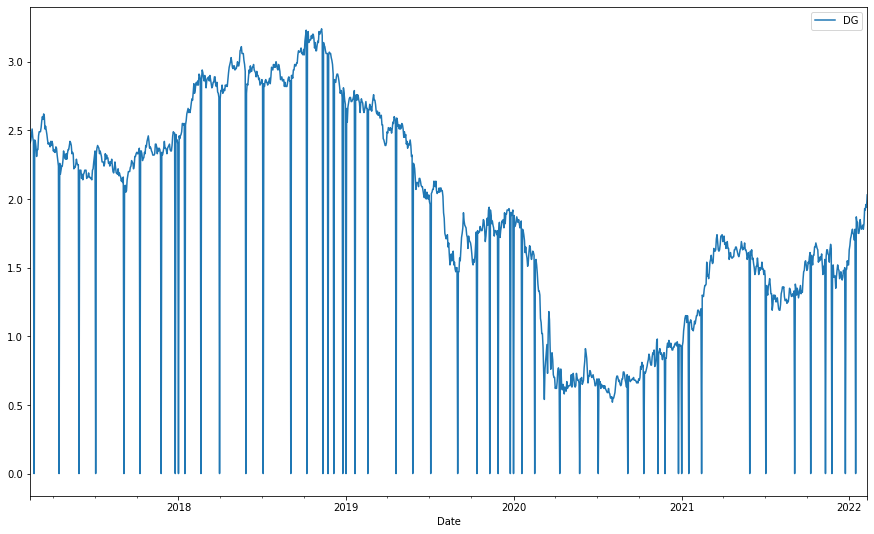

In [131]:
DG1[['DG']].plot(figsize=(15,9))